In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import semopy as sem
import scipy.stats as sts
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, OneHotEncoder
from factor_analyzer import FactorAnalyzer

# 1. Factor Analysis Brain MRI Indices

Factor analysis (FA) is a modeling technique that explains the covariance in data. In FA, the observed variables are linear combinations of the unobserved variables. In addition, underlying factors are labelable and interpretable. We conducted both Exploratory and Confirmatory Factor Analysis (EFA and CFA) using the Factor Analyzer package for python [1].

In [2]:
# Loading the data
data = pd.read_csv('casuality_data_final_factor_analyzer.csv')
data.shape

(2065, 1428)

In [3]:
# filtering brain MRI indices
brain_df = data.filter(regex='brain')
brain_df.shape

(2065, 744)

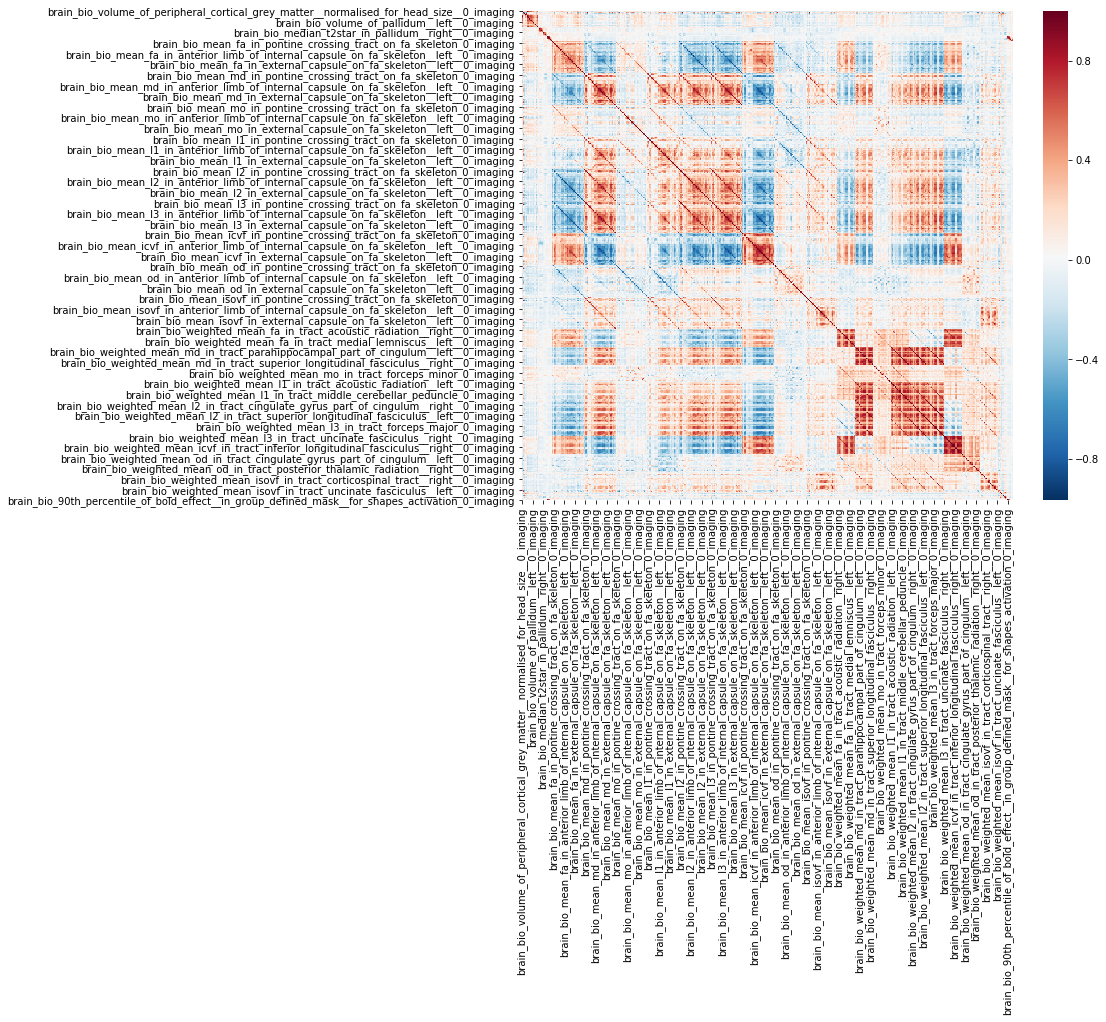

In [4]:
# Correlation heatmap
brain_corr = brain_df.corr()
plt.figure(figsize=(11,9))
sns.heatmap(brain_corr, cmap=plt.cm.RdBu_r)
plt.show()

In [5]:
# Data normalization
scaler = MinMaxScaler()
data_scaled_brain = scaler.fit_transform(brain_df)

To measure the suitability of FA, two different tests were run: KMO Test and Bartlett’s Test.

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. It estimates the proportion of variance among all the observed variables. Lower
proportion is more suitable for factor analysis. KMO values range between 0 and 1, and if the value is less than 0.6 is considered inadequate.

In [6]:
# KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(data_scaled_brain)

C:\Users\Alejandro\Downloads\ANACONDA\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [7]:
kmo_model

0.952603753238426

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test
found statistically insignificant, FA should not be employed. On the contrary, if the
p-value is close to 0 the test was statistically significant, indicating that the observed
correlation matrix is not an identity matrix

In [8]:
# Bartlett's test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled_brain)
chi_square_value, p_value

C:\Users\Alejandro\Downloads\ANACONDA\lib\site-packages\factor_analyzer\factor_analyzer.py:118: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\Alejandro\Downloads\ANACONDA\lib\site-packages\scipy\stats\_continuous_distns.py:1073: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(df/2.-1, x) - x/2. - sc.gammaln(df/2.) - (np.log(2)*df)/2.


(inf, nan)

KMO test result and the Bartlett’s testof sphericity are considered adecuate and statistically significant.  Therefore, securing the suitability of the data being used to extract this latent factor for FA.

In [9]:
# Create factor analysis object and perform factor analysis
fa_brain = FactorAnalyzer(n_factors=1, rotation = None)
fa_brain.fit(data_scaled_brain)

FactorAnalyzer(n_factors=1, rotation=None, rotation_kwargs={})

Eigenvalues represent variance explained each factor from the total variance. It is also known as characteristic roots.

In [10]:
# Check Eigenvalues
ev, v = fa_brain.get_eigenvalues()
ev

array([1.54437952e+02, 5.95904519e+01, 4.41599134e+01, 3.50600846e+01,
       2.90757110e+01, 2.20004587e+01, 2.01922093e+01, 1.48089754e+01,
       1.19073833e+01, 1.05527298e+01, 9.73343936e+00, 8.66881623e+00,
       8.06561257e+00, 7.79294141e+00, 7.41380911e+00, 7.13592084e+00,
       6.47068810e+00, 6.45325555e+00, 6.10163375e+00, 5.85206580e+00,
       5.48775359e+00, 5.05754058e+00, 4.96985751e+00, 4.84995054e+00,
       4.59351630e+00, 4.48429416e+00, 4.34784094e+00, 4.19880399e+00,
       3.96145325e+00, 3.93772505e+00, 3.82489706e+00, 3.65961747e+00,
       3.51198859e+00, 3.47864356e+00, 3.39048331e+00, 3.18123150e+00,
       3.15244975e+00, 3.00842733e+00, 2.94568330e+00, 2.85929690e+00,
       2.79646098e+00, 2.69913959e+00, 2.68302985e+00, 2.60365523e+00,
       2.50102104e+00, 2.49649516e+00, 2.45183616e+00, 2.43036925e+00,
       2.37163756e+00, 2.29512824e+00, 2.24860549e+00, 2.20737996e+00,
       2.09558090e+00, 2.09023251e+00, 2.02339619e+00, 1.98494210e+00,
      

Kaiser criterion is an analytical approach, which is based on the more significant proportion of variance explained by factor will be selected. The eigenvalue is a good criterion for determining the number of factors. Generally, an eigenvalue greater than 1 will be considered as selection criteria for the feature. The graphical approach is based on the visual representation of factors' eigenvalues also called scree plot. This scree plot helps us to determine the number of factors where the curve makes an elbow.

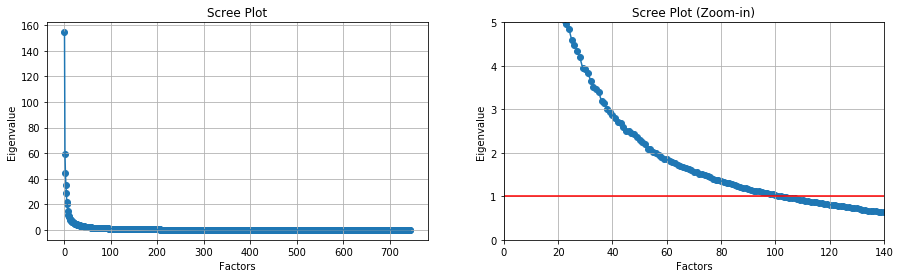

In [23]:
# Scree plot
fig = plt.figure(figsize=(15,4))
fig.add_subplot(121)
plt.scatter(range(1,data_scaled_brain.shape[1]+1),ev)
plt.plot(range(1,data_scaled_brain.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
fig.add_subplot(122)
plt.scatter(range(1,data_scaled_brain.shape[1]+1),ev)
plt.plot(range(1,data_scaled_brain.shape[1]+1),ev)
plt.xlim(0,140)
plt.ylim(0,5)
plt.axhline(1,color='r')
plt.title('Scree Plot (Zoom-in)')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor. It shows the variance explained by the observed variables.

In [13]:
brain_loadings = pd.DataFrame(fa_brain.loadings_, index=brain_df.columns)
brain_loadings.columns = ['Loadings']
brain_loadings.sort_values(by=['Loadings'], ascending=False)[:10]

,Loadings
brain_bio_mean_l3_in_anterior_corona_radiata_on_fa_skeleton__left__0_imaging,0.875992
brain_bio_mean_l3_in_anterior_corona_radiata_on_fa_skeleton__right__0_imaging,0.870006
brain_bio_mean_md_in_anterior_corona_radiata_on_fa_skeleton__left__0_imaging,0.865722
brain_bio_weighted_mean_l3_in_tract_inferior_fronto_occipital_fasciculus__right__0_imaging,0.859523
brain_bio_mean_md_in_superior_longitudinal_fasciculus_on_fa_skeleton__left__0_imaging,0.858544
brain_bio_mean_l2_in_anterior_corona_radiata_on_fa_skeleton__left__0_imaging,0.857454
brain_bio_mean_md_in_anterior_corona_radiata_on_fa_skeleton__right__0_imaging,0.856520
brain_bio_mean_l3_in_superior_corona_radiata_on_fa_skeleton__left__0_imaging,0.853679
brain_bio_mean_md_in_superior_longitudinal_fasciculus_on_fa_skeleton__right__0_imaging,0.852527
brain_bio_mean_l3_in_superior_longitudinal_fasciculus_on_fa_skeleton__right__0_imaging,0.851144


Commonalities are the sum of the squared loadings for each variable. It represents the common variance. It ranges from 0-1 and value close to 1 represents more variance.

In [15]:
brain_commu = pd.DataFrame(fa_brain.get_communalities(), columns= ['Communality'], index= brain_df.columns)
brain_commu.sort_values(by=['Communality'], ascending=False)[:10]

,Communality
brain_bio_mean_l3_in_anterior_corona_radiata_on_fa_skeleton__left__0_imaging,0.767361
brain_bio_mean_l3_in_anterior_corona_radiata_on_fa_skeleton__right__0_imaging,0.756911
brain_bio_mean_md_in_anterior_corona_radiata_on_fa_skeleton__left__0_imaging,0.749475
brain_bio_mean_icvf_in_anterior_corona_radiata_on_fa_skeleton__right__0_imaging,0.747540
brain_bio_mean_icvf_in_anterior_corona_radiata_on_fa_skeleton__left__0_imaging,0.739049
brain_bio_weighted_mean_l3_in_tract_inferior_fronto_occipital_fasciculus__right__0_imaging,0.738780
brain_bio_mean_md_in_superior_longitudinal_fasciculus_on_fa_skeleton__left__0_imaging,0.737097
brain_bio_mean_l2_in_anterior_corona_radiata_on_fa_skeleton__left__0_imaging,0.735228
brain_bio_mean_md_in_anterior_corona_radiata_on_fa_skeleton__right__0_imaging,0.733626
brain_bio_mean_l3_in_superior_corona_radiata_on_fa_skeleton__left__0_imaging,0.728767


In [24]:
g_brain = fa_brain.transform(brain_df)
g_brain.shape

(2065, 1)

In [25]:
data['g_brain'] = g_brain
min(data['g_brain']), max(data['g_brain'])

(57458510238.08445, 94128513552.17293)

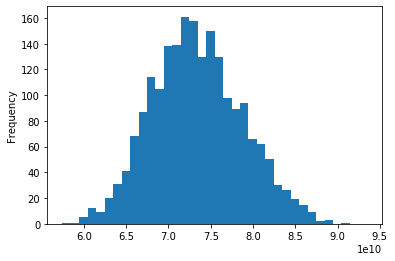

In [33]:
bin_values = np.arange(start=57458510238.08445, stop=94128513552.17293, step=1000000000)
data['g_brain'].plot(kind='hist', bins=bin_values)

# 2. References

[1]: [Navlani, A. (2019)](https://www.datacamp.com/community/tutorials/introduction-factor-analysis). Introduction to Factor Analysis in Python